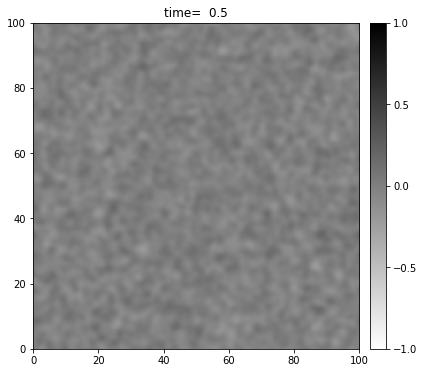

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time as tm

# grid size
n = 512
# for 1d simulation write N=(n,)
N=(n,n)
# diffusion coefficient
D = 1.0
# spatial dimensions
L = 100.0
dx = L / n
x = np.arange(0,L,dx)
# time
t = 0.0
total_time = 0.5


dt = 0.2 * 0.5 * dx**2 / D

def periodic_lap_2d(u,dx=1.0):
    return (+1*np.roll(u,+1,axis=0)
            +1*np.roll(u,-1,axis=0)
            +1*np.roll(u,+1,axis=1)
            +1*np.roll(u,-1,axis=1)
            -4*u) / dx**2
f = lambda u: u - u**3

plt.ion()
fig = plt.figure(1,figsize=(7,6))
plt.clf()
ax = fig.add_subplot(111)
# random initial condition
u = 2*np.random.random(N)-1.0
if len(N) == 1:
    lap = periodic_lap_1d
    p, = ax.plot(x,u)
    ax.axis([x[0],x[-1],-1.1,1.1])
if len(N) == 2:
    lap = periodic_lap_2d
    p = ax.imshow(u,cmap='binary', vmin=-1.0, vmax=1.0,extent=[0,L,0,L])
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.15 inch.
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = fig.colorbar(p, cax=colorbar_ax, ticks=[-1,-0.5,0,0.5,1])
ax.set_title("time={:5.1f}".format(0.0))

while t<total_time:
    t += dt
    u = u + dt * (f(u) + D * lap(u,dx) )
    # we don't need to plot again, just to update the data of the plot
    if len(N) == 1:
        p.set_data(x,u)
    if len(N) == 2:
        p.set_data(u)
    ax.set_title("time={:5.1f}".format(t))
    fig.canvas.draw()